## EDA

In [2]:
import utils
import pandas as pd

In [63]:
conn = utils.connection()
cursor = conn.cursor()
schema = "gitrepos"
table = "REPOS"

sql_command = "SELECT * FROM {};".format(str(table))
print (sql_command)

# Load the data
orig_data = pd.read_sql(sql_command, conn)

print(data.shape)


Connecting to database
Successfully connected to database
SELECT * FROM REPOS;
(2465, 17)


C:\software\anaconda3\envs\ml_test\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
data.head()

,repo_id,user_id,reponame,url,created_at,updated_at,pushed_at,has_issues,has_downloads,open_issue_count,size,fork,fork_count,visibility,watchers,language,description
0,537843003,73926427,YSChoi123/antjump-test,https//api.github.com/repos/YSChoi123/antjump-...,2022-09-17,2022-09-17 15:09:30,2022-09-17 15:15:15,True,True,0,311,False,0,public,0,JavaScript,None
1,537843005,35520358,zhangxq8692/opencv,https//api.github.com/repos/zhangxq8692/opencv,2022-09-17,2022-09-17 13:34:42,2022-09-17 11:05:20,False,True,0,509384,True,0,public,0,None,Open Source Computer Vision Library
2,537843007,108950041,Sanyi81/hw2,https//api.github.com/repos/Sanyi81/hw2,2022-09-17,2022-09-17 15:03:44,2022-09-17 15:07:05,True,True,0,305,False,0,public,0,JavaScript,None
3,537843010,82336393,bisherbh/healh-insurance-company,https//api.github.com/repos/bisherbh/healh-ins...,2022-09-17,2022-09-17 15:55:25,2022-09-17 16:07:01,True,True,0,1156,False,0,public,0,Dart,None
4,537843011,83750797,felipeLeao18/discord-pomodoro,https//api.github.com/repos/felipeLeao18/disco...,2022-09-17,2022-09-17 15:03:42,2022-09-17 15:03:38,True,True,0,1,False,0,public,0,JavaScript,None


### Finding top 5 languages for which repos were found

In [56]:
data = orig_data[data['language']!='None']
top_5 = data.sort_values(by="size", ascending=False).head()

<AxesSubplot: xlabel='language'>

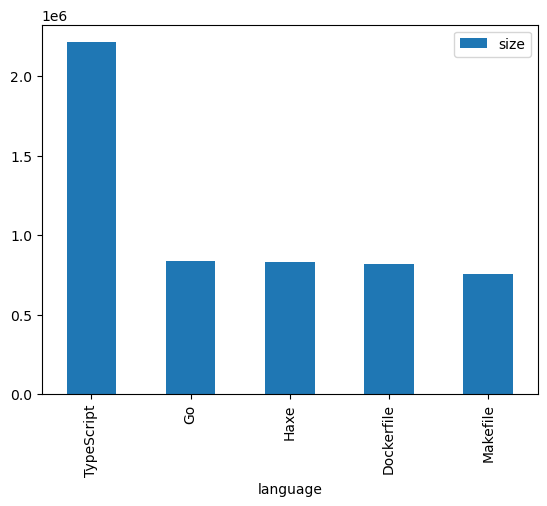

In [37]:
top_5.plot(x="language", y="size", kind="bar")

In [39]:
data.language.value_counts()

JavaScript          242
HTML                220
Python              107
Java                 91
TypeScript           65
CSS                  51
Jupyter Notebook     43
C#                   40
C++                  27
PHP                  22
C                    19
Kotlin               16
SCSS                 12
Shell                11
Rust                  9
Vue                   9
Dart                  8
Swift                 8
Go                    7
Makefile              6
R                     6
Dockerfile            5
EJS                   3
Less                  3
Assembly              2
Lua                   2
Ruby                  2
HCL                   2
Elixir                2
TeX                   2
Pascal                2
GDScript              2
Solidity              1
Hack                  1
Nix                   1
Rich Text Format      1
Wollok                1
Haxe                  1
Objective-C           1
Astro                 1
OCaml                 1
CMake           

<AxesSubplot: title={'center': 'Average size of repos for different languages'}, xlabel='language'>

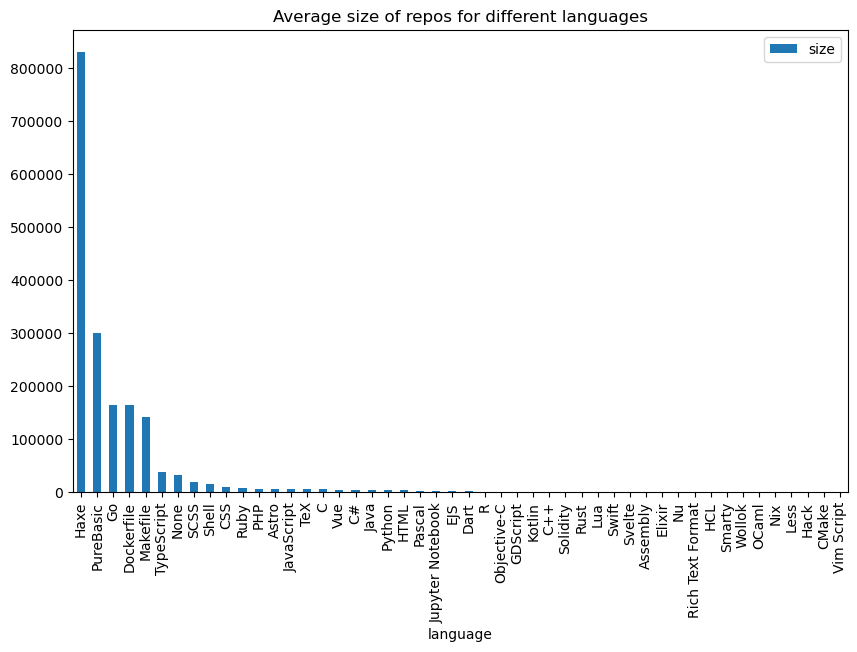

In [24]:
data[['language','size']].groupby('language').mean().sort_values(by='size', ascending=False).plot.bar(figsize=(10,6), rot=90, title='Average size of repos for different languages')

<AxesSubplot: title={'center': 'Total downloads of repos for different languages'}, xlabel='language'>

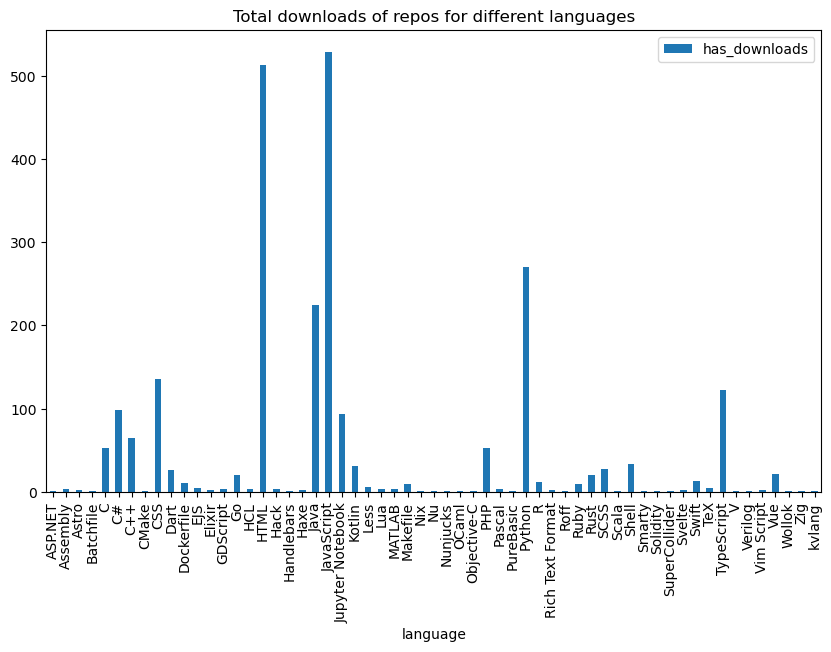

In [57]:
data[['language','has_downloads']].groupby('language').count().plot.bar(figsize=(10,6), rot=90, title='Total downloads of repos for different languages')

### User Perspective

In [64]:
data = orig_data

#### No of Unique Users

In [65]:
print("Total repos: ",len(data))
print("Number of unique users: ",data['user_id'].nunique())

Total repos:  5776
Number of unique users:  5246


#### Number of public repos grouped by user

In [66]:
repo_totals = data.groupby("user_id")['user_id'].count().sort_values(ascending=False).head(10)

In [68]:
repo_totals

user_id
74159972     18
113696628    16
81328016     11
109853314     7
111644494     7
113781609     6
99336188      6
97055360      6
102096655     5
89445335      5
Name: user_id, dtype: int64

#### Analyzing top 3 users 

In [51]:
top_user = data[data['user_id']==74159972]
top_user

,repo_id,user_id,reponame,url,created_at,updated_at,pushed_at,has_issues,has_downloads,open_issue_count,size,fork,fork_count,visibility,watchers,language,description
40,537843097,74159972,Tangerinrs/XSS-Filter-Evasion-Cheat-Sheet-CN,https//api.github.com/repos/Tangerinrs/XSS-Fil...,2022-09-17,2022-08-25 14:27:45,2014-05-18 10:29:54,False,True,0,245,True,0,public,0,None,XSS_Filter_Evasion_Cheat_Sheet 中文版
863,537841106,74159972,Tangerinrs/SQL-injection-bypass,https//api.github.com/repos/Tangerinrs/SQL-inj...,2022-09-17,2022-09-15 02:59:48,2022-09-07 13:03:02,False,True,0,2138,True,0,public,0,None,记录实战中的各种sql注入绕过姿势
944,537840046,74159972,Tangerinrs/redteam-tips,https//api.github.com/repos/Tangerinrs/redteam...,2022-09-17,2022-09-17 07:18:15,2020-05-20 07:09:43,False,True,0,50,True,0,public,0,None,关于红队方面的学习资料
1016,537839842,74159972,Tangerinrs/SecurityInterviewGuide,https//api.github.com/repos/Tangerinrs/Securit...,2022-09-17,2022-09-13 07:11:11,2022-07-13 05:29:04,False,True,0,5319,True,0,public,0,None,网络信息安全从业者面试指南
1144,537839754,74159972,Tangerinrs/awesome-toolbox-chinese,https//api.github.com/repos/Tangerinrs/awesome...,2022-09-17,2022-09-17 11:10:29,2022-09-14 01:54:38,False,True,0,44,True,0,public,0,None,🧰 优秀工具箱集合 - 收集，推荐好用、优秀的工具箱。工具箱大全。
1298,537839368,74159972,Tangerinrs/SpringBootVulExploit,https//api.github.com/repos/Tangerinrs/SpringB...,2022-09-17,2022-09-16 11:11:51,2021-03-10 13:03:25,False,True,0,135,True,0,public,0,None,SpringBoot 相关漏洞学习资料，利用方法和技巧合集，黑盒安全评估 check list
1348,537839108,74159972,Tangerinrs/my-re0-k8s-security,https//api.github.com/repos/Tangerinrs/my-re0-...,2022-09-17,2022-09-17 09:43:33,2022-08-01 07:06:45,False,True,0,37663,True,0,public,0,None,:atom: [WIP] 整理过去的分享，从零开始Kubernetes攻防 🧐
1404,537838847,74159972,Tangerinrs/pentest-treasure,https//api.github.com/repos/Tangerinrs/pentest...,2022-09-17,2022-09-13 06:49:17,2022-08-02 21:11:59,False,True,0,475,True,0,public,0,None,打造一个渗透测试藏宝阁！
1590,537838488,74159972,Tangerinrs/Pentest_MindMap,https//api.github.com/repos/Tangerinrs/Pentest...,2022-09-17,2022-09-13 02:30:30,2022-06-15 14:43:05,False,True,0,43456,True,0,public,0,None,个人翻译/总结渗透测试思维导图
1718,537838019,74159972,Tangerinrs/redteam_vul,https//api.github.com/repos/Tangerinrs/redteam...,2022-09-17,2022-09-16 09:27:39,2021-07-17 05:09:03,False,True,0,51,True,0,public,0,None,红队作战中比较常遇到的一些重点系统漏洞整理。


In [52]:
top_user2 = data[data['user_id']==113696628]
top_user2

,repo_id,user_id,reponame,url,created_at,updated_at,pushed_at,has_issues,has_downloads,open_issue_count,size,fork,fork_count,visibility,watchers,language,description
639,537841693,113696628,fukeluo/uyqgq,https//api.github.com/repos/fukeluo/uyqgq,2022-09-17,2022-09-17 14:58:58,2022-09-17 14:59:22,True,True,3,7,False,0,public,0,None,小黄人视频下载免费版/腾讯视频2018旧版本下载
965,537840082,113696628,fukeluo/giczvz,https//api.github.com/repos/fukeluo/giczvz,2022-09-17,2022-09-17 14:53:21,2022-09-17 14:53:45,True,True,4,6,False,0,public,0,None,十款免费软件app下载/快射视频腾讯图标安装下载
1170,537839424,113696628,fukeluo/stzvmr,https//api.github.com/repos/fukeluo/stzvmr,2022-09-17,2022-09-17 14:50:47,2022-09-17 14:51:11,True,True,3,7,False,0,public,0,None,免费视频软件app排行榜/粉色视频/小黄人视频下载免费版
1397,537838833,113696628,fukeluo/arwxh,https//api.github.com/repos/fukeluo/arwxh,2022-09-17,2022-09-17 14:48:39,2022-09-17 14:49:03,True,True,2,7,False,0,public,0,None,夜里十大禁用app软件排名最新/免费视频的软件app推荐
1698,537838337,113696628,fukeluo/nkujg,https//api.github.com/repos/fukeluo/nkujg,2022-09-17,2022-09-17 14:46:55,2022-09-17 14:47:19,True,True,1,6,False,0,public,0,None,好男人好看视频2019/免费视频的软件app推荐/夜里十大禁用app软件排名最新
2660,537828944,113696628,fukeluo/uog-uogqq,https//api.github.com/repos/fukeluo/uog-uogqq,2022-09-17,2022-09-17 14:13:03,2022-09-17 14:13:27,True,True,1,7,False,0,public,0,None,_tttzzz668_su/永不迷路-黑料正能量最新热点
2891,537828353,113696628,fukeluo/dbyue,https//api.github.com/repos/fukeluo/dbyue,2022-09-17,2022-09-17 14:10:56,2022-09-17 14:11:21,True,True,2,7,False,0,public,0,None,tttzzz668.su 黑料不打官/一个人看的www在线高清电影
3444,537826901,113696628,fukeluo/rualdj,https//api.github.com/repos/fukeluo/rualdj,2022-09-17,2022-09-17 14:05:45,2022-09-17 14:06:10,True,True,4,6,False,0,public,0,None,黑料正能量首页入口/tttzzz668.su黑料正能量
3578,537826435,113696628,fukeluo/dmhsk,https//api.github.com/repos/fukeluo/dmhsk,2022-09-17,2022-09-17 14:04:06,2022-09-17 14:04:30,True,True,1,7,False,0,public,0,None,24小时无人售货用品店/tttzzz668.su黑料正能量/黑料正能量首页入口
4087,537825330,113696628,fukeluo/hfm-hfmoq,https//api.github.com/repos/fukeluo/hfm-hfmoq,2022-09-17,2022-09-17 14:00:15,2022-09-17 14:00:39,True,True,2,6,False,0,public,0,None,黑料正能量导航/黑料正能量tttzzz永久入口/黑料正能量tttzzz网页


In [53]:
top_user3 = data[data['user_id']==81328016]
top_user3

,repo_id,user_id,reponame,url,created_at,updated_at,pushed_at,has_issues,has_downloads,open_issue_count,size,fork,fork_count,visibility,watchers,language,description
26,537843072,81328016,anylee2021/DOPPEngine,https//api.github.com/repos/anylee2021/DOPPEngine,2022-09-17,2022-08-31 04:19:51,2016-12-06 14:21:45,False,True,0,1650,True,0,public,0,None,None
56,537843120,81328016,anylee2021/TiledLighting11,https//api.github.com/repos/anylee2021/TiledLi...,2022-09-17,2022-08-31 04:20:02,2016-09-08 09:50:34,False,True,0,67032,True,0,public,0,None,AMD compute-based tiled lighting sample based ...
146,537842901,81328016,anylee2021/VkD3DDeviceMapping,https//api.github.com/repos/anylee2021/VkD3DDe...,2022-09-17,2022-08-31 04:18:44,2017-05-05 13:41:11,False,True,0,460,True,0,public,0,None,Simple example to show how to map devices betw...
165,537842936,81328016,anylee2021/LiquidVR,https//api.github.com/repos/anylee2021/LiquidVR,2022-09-17,2022-09-01 11:48:38,2017-04-06 18:13:57,False,True,0,16129,True,0,public,0,None,The LiquidVR™ SDK is a platform based on Direc...
193,537842628,81328016,anylee2021/FreesyncPremiumProSample,https//api.github.com/repos/anylee2021/Freesyn...,2022-09-17,2022-08-31 04:21:58,2020-01-21 15:35:24,False,True,0,207462,True,0,public,0,None,A simple demo to show Freesync Premium Pro int...
439,537842032,81328016,anylee2021/V-EZ,https//api.github.com/repos/anylee2021/V-EZ,2022-09-17,2022-09-14 09:11:01,2021-09-07 04:13:25,False,True,0,75207,True,0,public,0,None,None
514,537841824,81328016,anylee2021/RadeonImageFilter,https//api.github.com/repos/anylee2021/RadeonI...,2022-09-17,2022-09-11 03:14:45,2022-01-25 09:59:50,False,True,0,431757,True,0,public,0,None,None
538,537841872,81328016,anylee2021/RadeonRays_SDK,https//api.github.com/repos/anylee2021/RadeonR...,2022-09-17,2022-09-13 22:24:29,2022-01-05 18:49:03,False,True,0,93413,True,0,public,0,None,Radeon Rays is ray intersection acceleration l...
577,537841950,81328016,anylee2021/glTFSample,https//api.github.com/repos/anylee2021/glTFSample,2022-09-17,2022-08-31 03:56:52,2021-12-23 01:09:38,False,True,0,4717,True,0,public,0,None,A simple demo to show off the capabilities of ...
605,537841642,81328016,anylee2021/Orochi,https//api.github.com/repos/anylee2021/Orochi,2022-09-17,2022-09-09 16:53:40,2022-09-13 16:03:06,False,True,0,109009,True,0,public,0,None,None
